<a href="https://colab.research.google.com/github/ABChaeeun/ITB_Project/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# label = 대여구분코드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,387 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://raw.githubusercontent.com/ABChaeeun/ITB_Project/main/data/data.csv"
data = pd.read_csv(url)
data.head()

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120,0
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58,0
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,0
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,1
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,1


In [ ]:
data = data.drop('연령구분', axis = 1)
data

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22077,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22078,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566
22079,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22080,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [ ]:
data['대여구분'].value_counts()

3    11077
2     8557
0     1817
1      631
Name: 대여구분, dtype: int64

In [3]:
X = data[['월', '대여소번호','성별', '이용건수', '운동량', '탄소량', '이동거리', '이용시간']]
y = data['대여구분']

In [4]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16561, 8) (5521, 8) (16561,) (5521,)


## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.ensemble import RandomForestClassifier
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f73d202b0>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'log2', 'n_estimators': 508}
Best Cross-validity Score: 0.625
Test set Score: 0.627


In [ ]:
result_random = random_search.cv_results_

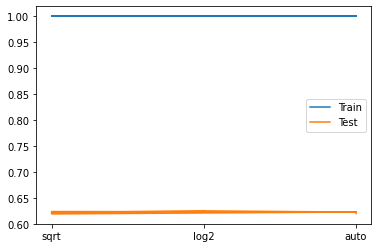

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_max_features'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_max_features'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

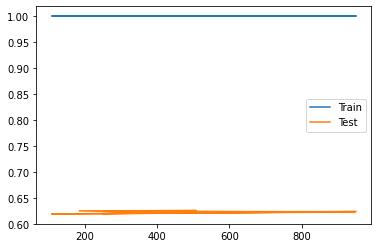

In [ ]:
plt.plot(result_random['param_n_estimators'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_estimators'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

In [ ]:
# 변수 중요도 시각화
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='log2', n_estimators=478)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.05796286 0.13741753 0.03205331 0.15226001 0.15747878 0.13124975
 0.14536201 0.18621574]


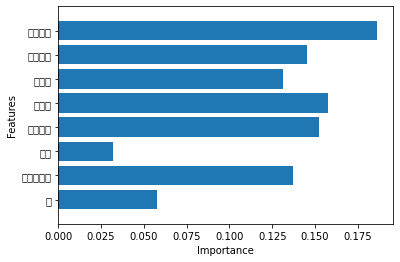

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_Forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_Forest(Forest)

In [ ]:
# 모델평가
from sklearn.metrics import confusion_matrix
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[1363    0    0    0]
 [   0  473    0    0]
 [   0    0 6418    0]
 [   0    0    0 8307]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[  86    0  287   81]
 [   2   20  109   27]
 [  43   17 1343  736]
 [  27    5  722 2016]]


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test, average="micro" )
f2=f1_score(y_test, pred_test, average="macro" )
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

micro f1 score:
 0.627603694982793
macro f1 score:
 0.4452805513535504


In [ ]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.54      0.19      0.28       454
           1       0.48      0.13      0.20       158
           2       0.55      0.63      0.58      2139
           3       0.70      0.73      0.72      2770

    accuracy                           0.63      5521
   macro avg       0.57      0.42      0.45      5521
weighted avg       0.62      0.63      0.61      5521



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train))) # 과적합
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.659
시험용 데이터 세트 정확도: 0.634


In [ ]:
result = gbrt.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.05302565 0.03968054 0.03614801 0.50327481 0.03373911 0.02386451
 0.04904292 0.26122444]


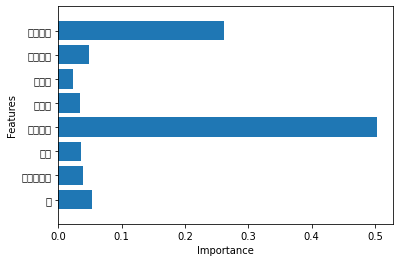

In [ ]:
def plot_feature_importances_gbrt(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_gbrt(gbrt)

In [ ]:
# 나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.741
시험용 데이터 세트 정확도: 0.643


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 
gbrt_pred = gbrt.predict(X_test)
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Gradient boosting 시험용 데이터 세트 정확도:0.643
[[ 115    0  281   58]
 [   1   17  112   28]
 [  53   15 1442  629]
 [  43    1  750 1976]]


In [ ]:
print("Gradient Boosting:")

Gradient Boosting:


In [ ]:
print(classification_report(y_test, gbrt_pred))

              precision    recall  f1-score   support

           0       0.54      0.25      0.35       454
           1       0.52      0.11      0.18       158
           2       0.56      0.67      0.61      2139
           3       0.73      0.71      0.72      2770

    accuracy                           0.64      5521
   macro avg       0.59      0.44      0.46      5521
weighted avg       0.64      0.64      0.63      5521



대여구분코드 = 0이나 1인 f1-score기 닞은 이유 = 애초에 0,1인 데이터가 많이 없음.

# label = 이용건수

In [ ]:
data.head()

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140


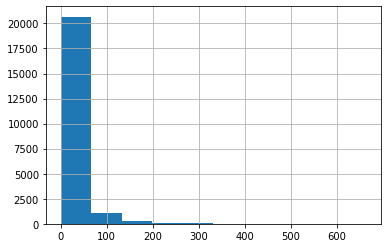

In [ ]:
data['이용건수'].hist()

In [ ]:
data['이용건수'].value_counts()

1      3495
2      2858
3      1722
4      1356
5      1015
       ... 
293       1
225       1
405       1
357       1
248       1
Name: 이용건수, Length: 288, dtype: int64

In [ ]:
data['이용건수'].mean()

18.719635902545058

In [ ]:
data['이용건수'].describe()

count    22082.000000
mean        18.719636
std         34.591564
min          1.000000
25%          2.000000
50%          6.000000
75%         20.000000
max        662.000000
Name: 이용건수, dtype: float64

In [ ]:
data.query('이용건수 <= 10')

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
5,1,800,800. 목월공원 앞,2,0,0,2,44.29,0.40,1720.82,119
...,...,...,...,...,...,...,...,...,...,...,...
22075,6,4639,4639. 동빙고근린공원,3,1,1,8,496.80,4.18,18026.65,164
22077,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22079,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22080,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [ ]:
data2 = data.groupby('대여소번호').agg(sum_use = ('이용건수', 'sum'))
data2

,sum_use
대여소번호,
800,5829
802,2601
803,901
805,6411
806,5111
...,...
4634,3220
4636,498
4637,156


In [ ]:
data2.sort_values(by = 'sum_use', ascending = False)

,sum_use
대여소번호,
853,21689
870,18253
825,15597
837,12362
829,12305
...,...
865,509
4636,498
4639,308


# label = 대여구분코드 0/1 제외

## Random Forest

In [ ]:
data

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22077,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22078,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566
22079,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22080,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [14]:
data = data.drop(index = data[data['대여구분'] == 0].index)
data = data.drop(index = data[data['대여구분'] == 1].index)
data

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,0
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,1
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,1
5,1,800,800. 목월공원 앞,2,0,0,2,44.29,0.40,1720.82,119,0
6,1,800,800. 목월공원 앞,2,2,3,5,609.95,5.96,25690.59,247,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22077,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344,1
22078,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566,0
22079,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459,0
22080,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9,0


In [15]:
data['대여구분'].value_counts()

3    11077
2     8557
Name: 대여구분, dtype: int64

In [16]:
X = data[['월', '대여소번호','성별', '이용건수', '운동량', '탄소량', '이동거리', '이용시간']]
y = data['대여구분']

In [17]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14725, 8) (4909, 8) (14725,) (4909,)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}
random_search=RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f60a5e100>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'log2', 'n_estimators': 555}
Best Cross-validity Score: 0.701
Test set Score: 0.698


In [ ]:
result_random = random_search.cv_results_

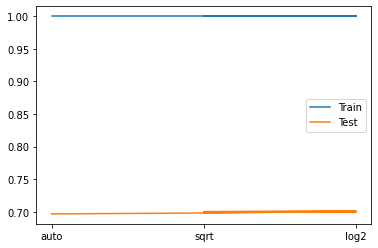

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_max_features'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_max_features'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

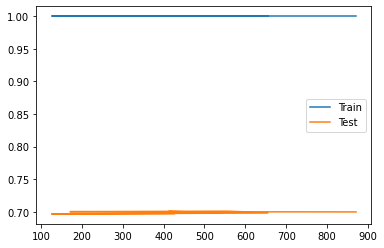

In [ ]:
plt.plot(result_random['param_n_estimators'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_estimators'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

In [ ]:
# 변수 중요도 시각화
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='log2', n_estimators=478)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.06081003 0.12891336 0.02813582 0.17515478 0.15281666 0.126667
 0.14213794 0.18536441]


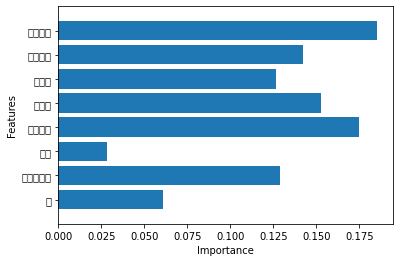

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_Forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_Forest(Forest)

In [ ]:
# 모델평가
from sklearn.metrics import confusion_matrix
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[6418    0]
 [   0 8307]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[1437  702]
 [ 790 1980]]


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test, average="micro" )
f2=f1_score(y_test, pred_test, average="macro" )
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

micro f1 score:
 0.6960684457119576
macro f1 score:
 0.6923036980549696


In [ ]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           2       0.65      0.67      0.66      2139
           3       0.74      0.71      0.73      2770

    accuracy                           0.70      4909
   macro avg       0.69      0.69      0.69      4909
weighted avg       0.70      0.70      0.70      4909



In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,pred)

In [ ]:
accuracy

0.6917905887146059

## Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [20]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train))) # 과적합
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.716
시험용 데이터 세트 정확도: 0.685


In [21]:
result = gbrt.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.05021755 0.0240756  0.03032373 0.52630149 0.0288445  0.02412066
 0.03675824 0.27935821]


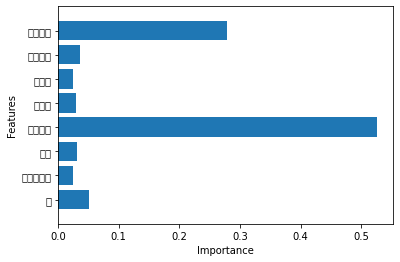

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_gbrt(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_gbrt(gbrt)

In [23]:
# 나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.776
시험용 데이터 세트 정확도: 0.705


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 
gbrt_pred = gbrt.predict(X_test)
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Gradient boosting 시험용 데이터 세트 정확도:0.705
[[1517  622]
 [ 825 1945]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gbrt_pred))

              precision    recall  f1-score   support

           2       0.65      0.71      0.68      2139
           3       0.76      0.70      0.73      2770

    accuracy                           0.71      4909
   macro avg       0.70      0.71      0.70      4909
weighted avg       0.71      0.71      0.71      4909

